# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import seaborn as sns

# Preprocessing

Shape of dataset df :  (13476, 2)

Number of Null values present :
Article    3
Class      0
dtype: int64

Shape of features:  (13473, 17765)

Count Plot


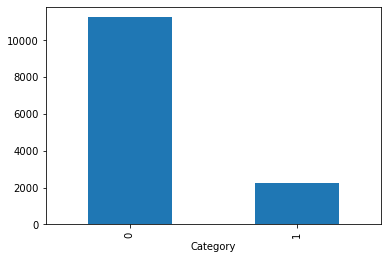

In [2]:
#Reading dataset
df = pd.read_excel("dataset.xlsx")

print('Shape of dataset df : ',df.shape)
print('\nNumber of Null values present :')
print(df.isnull().sum())


######################################################################
#Hate - 0  and Genuine - 1 

Cat = []
for i in df.Class:
    if i == 'Hate':
        Cat.append(0)
        
    else:
        Cat.append(1)
        
df['Category'] = Cat

#Count Plot -- Bar Plot
df.groupby('Category').Category.count().plot.bar(ylim=0)

#Dropping Null values
df.dropna(inplace=True)
df.reset_index(inplace= True)

#Deleting Index column
del df['index']

#Vectorization

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Article).toarray()
labels = df.Category

print('\nShape of features: ',features.shape)
print('\nCount Plot')

#### Find the best dataset count suitable from RQ2 using evaluation metrics, hypertune parameters both algorithms
                    Classification report + Confusion matrix in visual + ROC AUC Curve

Classification report for Decision Tree Algorithm for 10000 dataset :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2894
           1       1.00      0.91      0.95       579

    accuracy                           0.99      3473
   macro avg       0.99      0.96      0.97      3473
weighted avg       0.99      0.99      0.99      3473

Classification report for Naive Bayes Algorithm for 10000 dataset :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2894
           1       0.90      1.00      0.95       579

    accuracy                           0.98      3473
   macro avg       0.95      0.99      0.97      3473
weighted avg       0.98      0.98      0.98      3473

Heat Map for  Decision Tree 
 AxesSubplot(0.125,0.536818;0.62x0.343182)
Heat Map for  Naive Bayes 
 AxesSubplot(0.125,0.125;0.62x0.343182)
Accuracy comparison


,Decision Tree,Naive Bayes
No. of Observations,,
10000,99.0,98.0


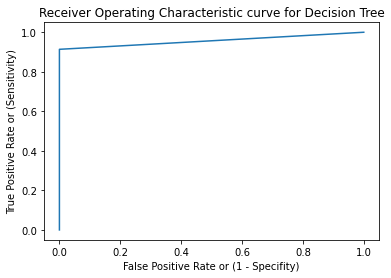

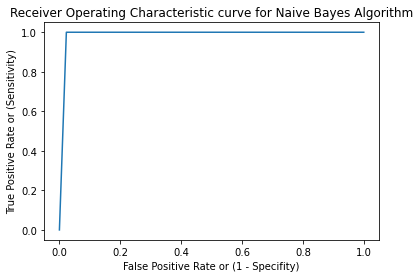

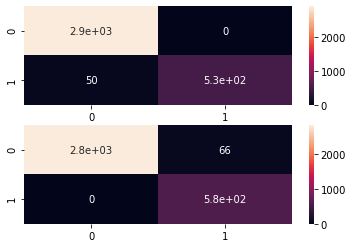

In [3]:
DT_Accuracy = []
NB_Accuracy = []

i = 0.74222519112299
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=i, random_state=42)
    
##########################################################################################################################
    
#Decison Tree
D_model = DecisionTreeClassifier(random_state=0, max_depth=3)
D_model.fit(X_train,y_train)

y_pred = D_model.predict(X_test)
DT_classification_report = classification_report(y_test,y_pred)
print('Classification report for Decision Tree Algorithm for 10000 dataset :\n',DT_classification_report)
DT_Accuracy.append(round(accuracy_score(y_test,y_pred),2)*100)
DT_Conf_Matrix = confusion_matrix(y_test,y_pred)

#ROC_AUC_Curve for Decision Tree
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic curve for Decision Tree')

###########################################################################################################################

#Naive Bayes
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)
NB_classification_report = classification_report(y_test,y_pred)
print('Classification report for Naive Bayes Algorithm for 10000 dataset :\n',NB_classification_report)
NB_Accuracy.append(round(accuracy_score(y_test,y_pred),2)*100)
NB_Conf_Matrix = confusion_matrix(y_test,y_pred)

#ROC_AUC_Curve for Naive Bayes
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic curve for Naive Bayes Algorithm')

###########################################################################################################################

fig, ax =plt.subplots(2,1)
plot=[DT_Conf_Matrix,NB_Conf_Matrix]

for i,j,k in zip(plot,[0,1],['Decision Tree','Naive Bayes']):
    print('Heat Map for ',k, '\n',sns.heatmap(i, ax=ax[j],annot=True))
    
print('Accuracy comparison')
Accuracy = pd.DataFrame(index=['10000'],columns=['Decision Tree','Naive Bayes'])
Accuracy['Decision Tree'] = DT_Accuracy
Accuracy['Naive Bayes'] = NB_Accuracy
Accuracy.index.name = 'No. of Observations'
Accuracy